In [0]:
import tensorflow.compat.v1  as tf
tf.disable_v2_behavior()
import numpy as np

In [0]:
# XOR problem not solve with linear function
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])

In [0]:
neurons_input = 2
neurons_hidden = 3
neurons_out = 1

[ 9.14633131e-01 -2.82305276e-01 -3.14444921e-01  3.20311325e-01
 -2.98086243e-01 -1.98328491e-01 -6.04903224e-01 -1.70635434e+00
 -1.23453076e+00  9.00975206e-01 -4.01505838e-01 -5.26697649e-01
 -4.60111520e-01 -2.57510268e-01  4.02134304e-01  4.96119368e-01
  5.53086560e-01 -1.41464525e+00 -2.53188491e+00 -8.30674248e-01
  3.30809418e-01  2.04659266e-01  1.30927163e-01 -2.06316370e+00
 -2.52763825e-02 -7.46591890e-01 -1.08210329e+00  7.70897917e-01
  2.53981594e-01 -1.19052210e+00  2.23845400e-01  1.57496136e+00
 -4.45032783e-01 -2.71778547e+00 -3.32412648e-01 -1.06049663e+00
 -5.96714637e-02 -3.05451394e-01  1.44881516e-01 -4.90751310e-01
 -9.42829763e-01  1.78096804e+00  7.17210668e-01  9.03448916e-01
 -3.41697616e-01  1.48766095e+00 -1.57260752e+00 -1.06961060e+00
 -3.96598824e-01  8.65502054e-01  2.13376701e-01 -4.88818450e-01
 -2.59090291e+00  5.42987442e-01  3.40221567e-01 -1.45553403e+00
  1.43495987e+00 -6.97802041e-01 -3.00475125e-01 -5.79412080e-02
  1.25180342e+00  1.36269

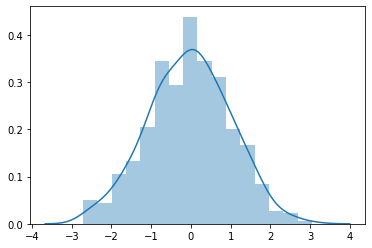

In [48]:
# random normalize from statistics
distribution = np.random.normal(size = 500)
print(distribution)
import seaborn as sns
%matplotlib inline
sns.distplot(distribution)

In [0]:
weight = {
            'hidden': tf.Variable(tf.random_normal([neurons_input, neurons_hidden]), name='w_hidden'), 
            'out': tf.Variable(tf.random_normal([neurons_hidden, neurons_out]), name='w_out')
         }

In [50]:
print(weight['hidden'])
print(weight['out'])

<tf.Variable 'w_hidden_6:0' shape=(2, 3) dtype=float32_ref>
<tf.Variable 'w_out_5:0' shape=(3, 1) dtype=float32_ref>


In [0]:
bias = { 
    'hidden': tf.Variable(tf.random_normal([neurons_hidden]), name = 'bias_hidden' ),
    'out': tf.Variable(tf.random_normal([neurons_out]), name='bias_out' )
    }

In [0]:
x_placeholder = tf.placeholder(tf.float32, [4, neurons_input], name='xph')
y_placeholder = tf.placeholder(tf.float32, [4, neurons_out], name='yph')

In [0]:
# Calculation of sum and function activation (sigmoid) in input to hidden layer
layer_hidden = tf.add( tf.matmul(x_placeholder, weight['hidden']), bias['hidden'])
layer_hidden_activation = tf.sigmoid(layer_hidden)

In [0]:
# Calculation of sum and function activation (softmax) in hidden to out layer
layer_out = tf.add(tf.matmul(layer_hidden_activation, weight['out']), bias['out'])
layer_out_activation = tf.sigmoid(layer_out)

In [0]:
# Calculation of error 
error = tf.losses.mean_squared_error(y_placeholder, layer_out_activation)
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.3).minimize(error)

In [62]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # print(sess.run(weight['hidden']))
  # print("\n\n", sess.run( weight['out'] ))
  # print(sess.run(bias['hidden']))
  # print(sess.run(bias['out']))
  # print(sess.run(layer_hidden, feed_dict= {x_placeholder: x} ))
  # print(sess.run(layer_hidden_activation, feed_dict={ x_placeholder: x }))
  #print(sess.run(layer_out_activation, feed_dict= {x_placeholder: x}))

  for epoch in range(10000):
    error_medium = 0
    _, cost = sess.run([optimizer, error], feed_dict={ x_placeholder: x, y_placeholder: y })
    if epoch % 200 == 0:
      error_medium += cost / 4
      print(error_medium) 

  weights_final, bias_final = sess.run([weight, bias])

0.08628825843334198
0.059180520474910736
0.05526307597756386
0.05026668310165405
0.044917576014995575
0.038938187062740326
0.03106832504272461
0.021917426958680153
0.01427236758172512
0.009342394769191742
0.006445025559514761
0.004712565802037716
0.00362007855437696
0.002891595708206296
0.0023814074229449034
0.0020091449841856956
0.0017281360924243927
0.0015099627198651433
0.0013365446357056499
0.0011959383264183998
0.0010799879673868418
0.0009829736081883311
0.0009007650660350919
0.0008303349604830146
0.0007694047526456416
0.0007162373512983322
0.0006694828043691814
0.000628085108473897
0.0005912005435675383
0.000558151863515377
0.0005283867940306664
0.0005014539929106832
0.00047697831178084016
0.00045464886352419853
0.00043420010479167104
0.00041541297105140984
0.00039809721056371927
0.00038209103513509035
0.00036725509562529624
0.0003534684074111283
0.00034062613849528134
0.0003286388237029314
0.0003174235753249377
0.00030691141728311777
0.0002970385830849409
0.00028775015380233526


In [63]:
weights_final

{'hidden': array([[-5.9499264, -2.361541 ,  3.441768 ],
        [-6.015493 , -2.4170291,  3.4122925]], dtype=float32),
 'out': array([[ 9.497599 ],
        [-4.5798936],
        [ 6.7795672]], dtype=float32)}

In [65]:
bias_final

{'hidden': array([ 2.4331613,  3.8325517, -5.3560605], dtype=float32),
 'out': array([-0.84397554], dtype=float32)}

## Test

In [0]:
# Calculation of sum and function activation (sigmoid) in input to hidden layer
layer_hidden_test = tf.add( tf.matmul(x_placeholder, weights_final['hidden']), bias_final['hidden'])
layer_hidden_activation_test = tf.sigmoid(layer_hidden_test)

# Calculation of sum and function activation (softmax) in hidden to out layer
layer_out_test = tf.add(tf.matmul(layer_hidden_activation_test, weights_final['out']), bias_final['out'])
layer_out_activation_test = tf.sigmoid(layer_out_test)

In [69]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print(sess.run(layer_out_activation_test, feed_dict= {x_placeholder: x}))

[[0.9688228 ]
 [0.03158138]
 [0.03157443]
 [0.968218  ]]
